# Import necessary libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from google.colab import files
uploaded = files.upload()

Saving Political_Project.xlsx to Political_Project.xlsx


In [22]:
Political_Project = list(uploaded.keys())[0]
data = pd.read_excel(Political_Project)

In [23]:
print(data.head())

   Serial No. of Polling Station  Manish Sisodia  Ravinder Singh Negi  Rakesh  \
0                              1             241                   75       8   
1                              2             298                  157       0   
2                              3             320                  158       8   
3                              4             224                  247       2   
4                              5             147                  226       1   

   Laxman Rawat  Pratap Chandra  Rakesh Suri  Vinay Kumar Singh  \
0             8               0            0                  0   
1             2               0            0                  0   
2             8               1            1                  0   
3            13               0            0                  0   
4            11               0            0                  0   

   Shatrughan Kumar Singh  Sanjeev Bhati  Surender Gupta  Gopal Prasad  \
0                       0           

In [27]:
# Check for the required columns

if 'Manish Sisodia' in data.columns and 'Ravinder Singh Negi' in data.columns:
    # Function to determine the winner at each polling station

    def determine_winner(row):
        if row['Manish Sisodia'] > row['Ravinder Singh Negi']:
            return 'Manish Sisodia'
        elif row['Ravinder Singh Negi'] > row['Manish Sisodia']:
            return 'Ravinder Singh Negi'
        else:
            return 'Tie'

In [29]:
# Create a new column for winners
data['Winner'] = data.apply(determine_winner, axis=1)

# Question Number 1


In [30]:
# Count the number of polling stations won by each candidate
winner_counts = data['Winner'].value_counts()
print("\nNumber of Polling Stations Won by Each Candidate:")
print(winner_counts)


Number of Polling Stations Won by Each Candidate:
Winner
Ravinder Singh Negi    103
Manish Sisodia          93
Tie                      1
Name: count, dtype: int64


<ipython-input-31-520fb2bf17a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='Set2')


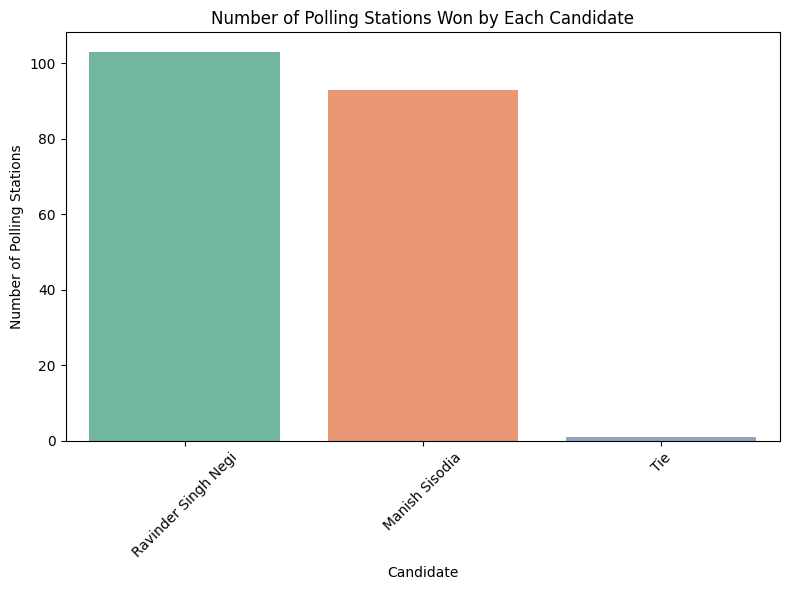

In [31]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=winner_counts.index, y=winner_counts.values, palette='Set2')
plt.title('Number of Polling Stations Won by Each Candidate')
plt.xlabel('Candidate')
plt.ylabel('Number of Polling Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

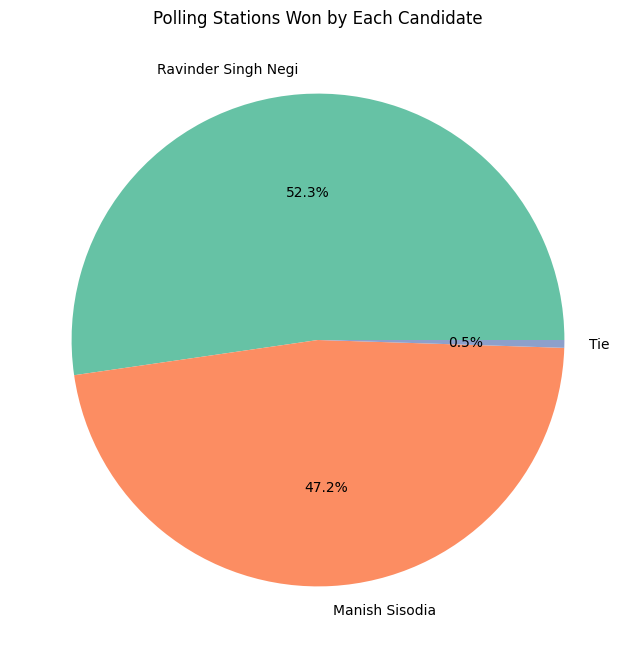

In [32]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('Set2', len(winner_counts)))
plt.title('Polling Stations Won by Each Candidate')
plt.show()

# Question Number 2

In [34]:
# Calculate the margin of loss for Manish Sisodia
data['Loss Margin'] = data['Ravinder Singh Negi'] - data['Manish Sisodia']

In [35]:
# Filter booths where Manish Sisodia lost by more than 50 votes
lost_booths = data[data['Loss Margin'] > 50]
num_lost_booths = len(lost_booths)
print(f"Number of booths where Manish Sisodia lost by more than 50 votes: {num_lost_booths}")

Number of booths where Manish Sisodia lost by more than 50 votes: 80


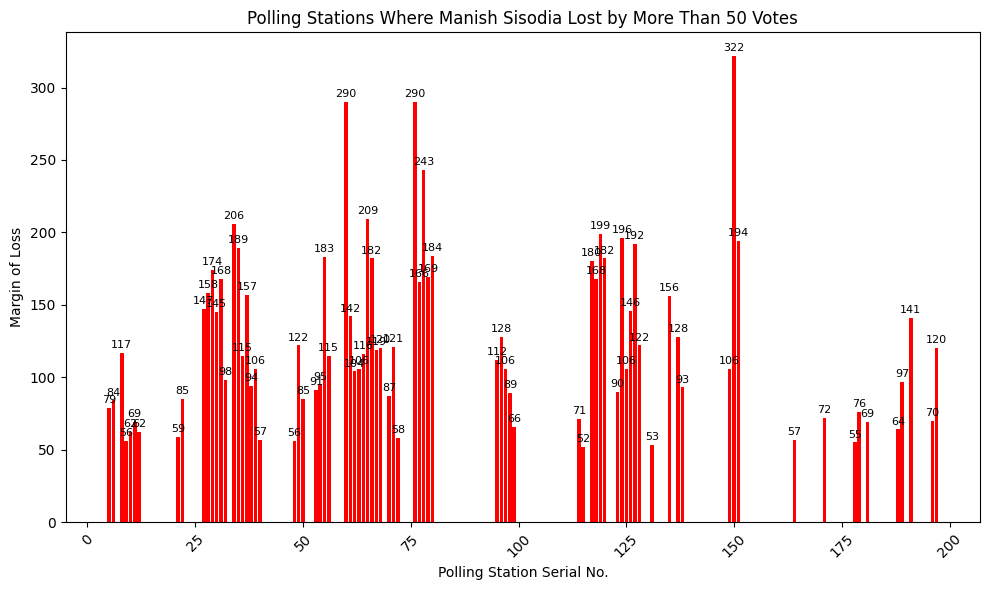

In [36]:
# Visualization - Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(lost_booths['Serial No. of Polling Station'], lost_booths['Loss Margin'], color='red')
plt.title("Polling Stations Where Manish Sisodia Lost by More Than 50 Votes")
plt.xlabel("Polling Station Serial No.")
plt.ylabel("Margin of Loss")
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with values
for index, row in lost_booths.iterrows():
    plt.text(row['Serial No. of Polling Station'], row['Loss Margin'] + 2, int(row['Loss Margin']),
              ha='center', va='bottom', fontsize=8, color='black')

# Display the plot
plt.show()

There are **80 number of booths** where Manish Sisodia lost by more than 50 votes

# Question Number 3

In [37]:
# Calculate the winning margin for Ravinder Singh Negi
data['Winning Margin'] = data['Ravinder Singh Negi'] - data['Manish Sisodia']

In [38]:
# Filter booths where Ravinder Singh Negi won by 100 or more votes
won_booths = data[data['Winning Margin'] >= 100]
num_won_booths = len(won_booths)
print(f"Number of booths where Ravinder Singh Negi won by 100 or more votes: {num_won_booths}")

Number of booths where Ravinder Singh Negi won by 100 or more votes: 48


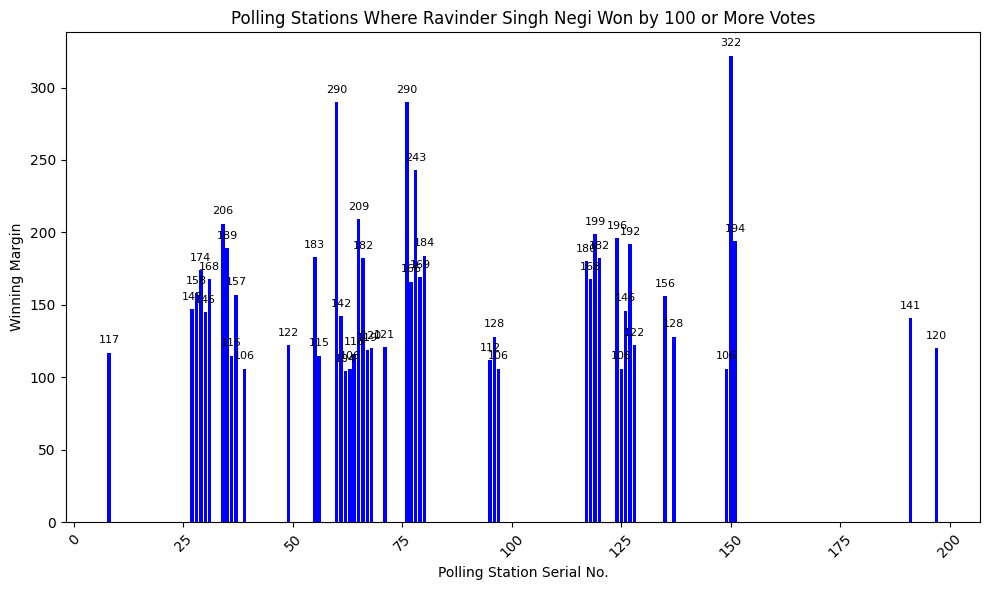

In [39]:
# Visualization - Bar Plot
plt.figure(figsize=(10, 6))
plt.bar(won_booths['Serial No. of Polling Station'], won_booths['Winning Margin'], color='blue')
plt.title("Polling Stations Where Ravinder Singh Negi Won by 100 or More Votes")
plt.xlabel("Polling Station Serial No.")
plt.ylabel("Winning Margin")
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with values
for index, row in won_booths.iterrows():
    plt.text(row['Serial No. of Polling Station'], row['Winning Margin'] + 5, int(row['Winning Margin']),
              ha='center', va='bottom', fontsize=8, color='black')

# Display the plot
plt.show()

There are **48 Number of booths** where Ravinder Singh Negi won by 100 or more votes

# Top 5 Booths with the Highest Winning Margin

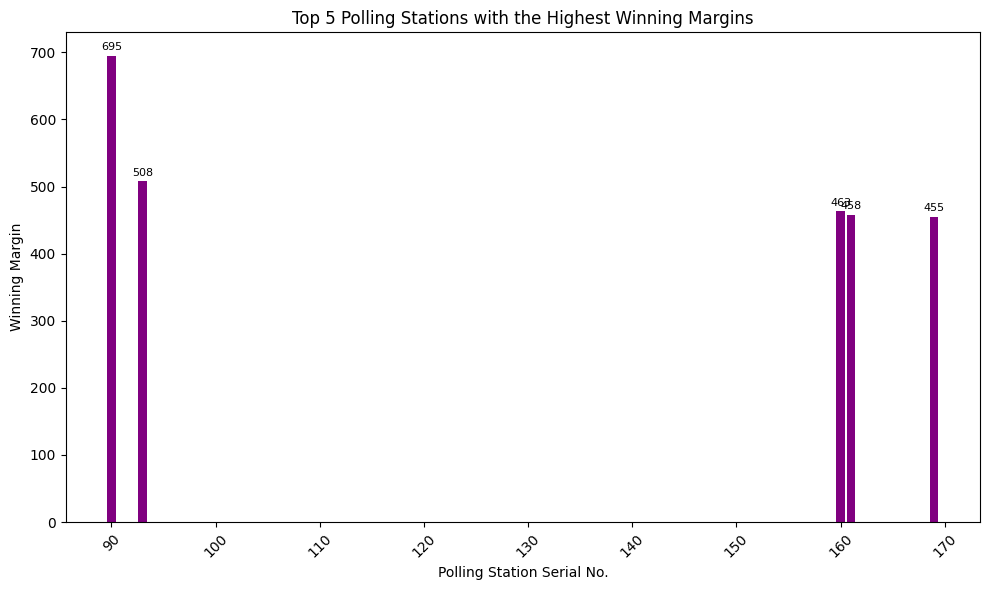

In [40]:
# Calculate the Winning Margin
data['Winning Margin'] = abs(data['Ravinder Singh Negi'] - data['Manish Sisodia'])

# Sort data to find the top 5 polling stations with the highest margins
top_5_margins = data.sort_values(by='Winning Margin', ascending=False).head(5)

# Bar Plot for Top 5 Margins
plt.figure(figsize=(10, 6))
plt.bar(top_5_margins['Serial No. of Polling Station'], top_5_margins['Winning Margin'], color='purple')
plt.title("Top 5 Polling Stations with the Highest Winning Margins")
plt.xlabel("Polling Station Serial No.")
plt.ylabel("Winning Margin")
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the plot
for index, row in top_5_margins.iterrows():
    plt.text(row['Serial No. of Polling Station'], row['Winning Margin'] + 5, int(row['Winning Margin']),
             ha='center', va='bottom', fontsize=8)

plt.show()

# Overall Vote Share Between Candidates

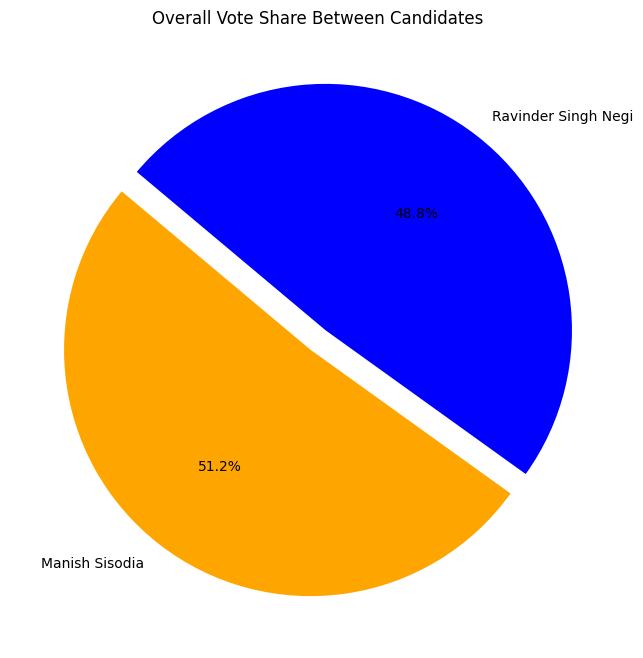

In [41]:
# Calculate total votes for Manish Sisodia and Ravinder Singh Negi
total_votes_manish = data['Manish Sisodia'].sum()
total_votes_ravi = data['Ravinder Singh Negi'].sum()

# Pie Chart for Vote Share
votes = [total_votes_manish, total_votes_ravi]
candidates = ['Manish Sisodia', 'Ravinder Singh Negi']
colors = ['orange', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(votes, labels=candidates, colors=colors, autopct='%1.1f%%', startangle=140, explode=[0.05, 0.05])
plt.title("Overall Vote Share Between Candidates")
plt.show()

# Winning Trend Across Polling Stations

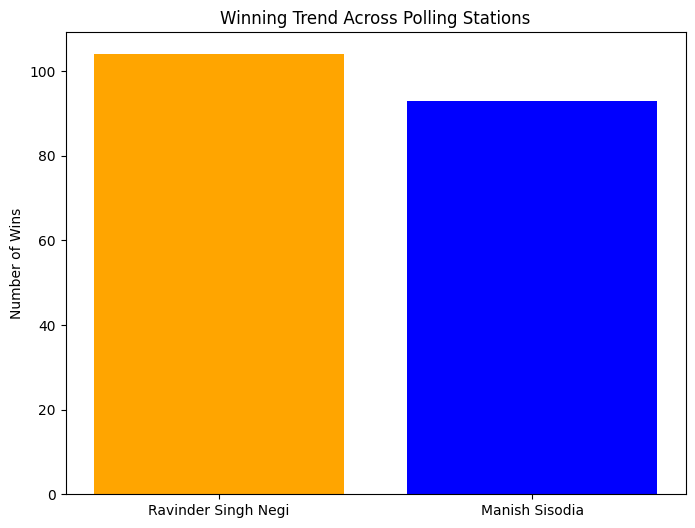

In [43]:
# Identify winner at each polling station
data['Winner'] = data.apply(lambda row: 'Manish Sisodia' if row['Manish Sisodia'] > row['Ravinder Singh Negi'] else 'Ravinder Singh Negi', axis=1)

# Count wins for each candidate
wins = data['Winner'].value_counts()

# Bar Plot for Wins
plt.figure(figsize=(8, 6))
plt.bar(wins.index, wins.values, color=['orange', 'blue'])
plt.title("Winning Trend Across Polling Stations")
plt.ylabel("Number of Wins")
plt.show()

# Margin Distribution for Both Candidates

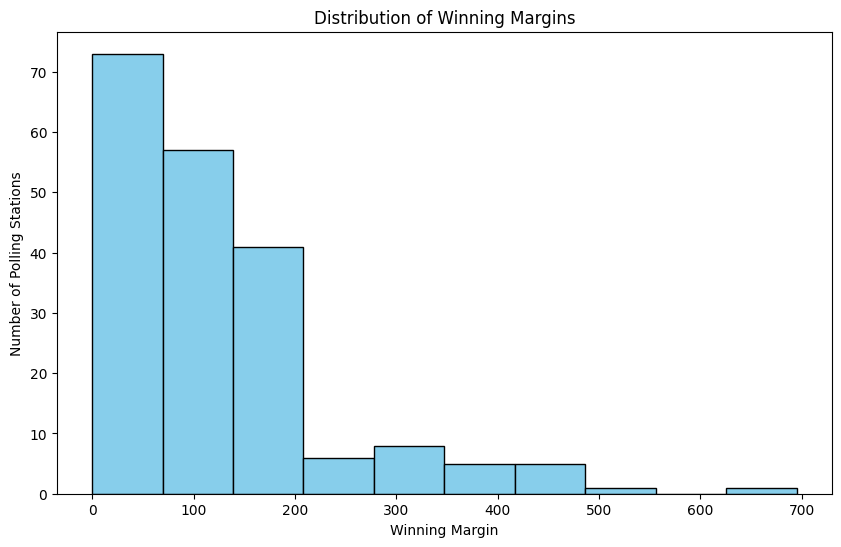

In [44]:
# Calculate the margin of victory
data['Winning Margin'] = abs(data['Ravinder Singh Negi'] - data['Manish Sisodia'])

# Plot a histogram for winning margins
plt.figure(figsize=(10, 6))
plt.hist(data['Winning Margin'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Winning Margins")
plt.xlabel("Winning Margin")
plt.ylabel("Number of Polling Stations")
plt.show()

# Statistical Insights: Average Votes Received by Each Candidate

In [45]:
# Calculate average votes for each candidate
average_votes_manish = data['Manish Sisodia'].mean()
average_votes_ravi = data['Ravinder Singh Negi'].mean()

# Print results
print(f"Average votes received by Manish Sisodia: {average_votes_manish:.2f}")
print(f"Average votes received by Ravinder Singh Negi: {average_votes_ravi:.2f}")

Average votes received by Manish Sisodia: 355.20
Average votes received by Ravinder Singh Negi: 338.59


# Heatmap of Vote Distribution

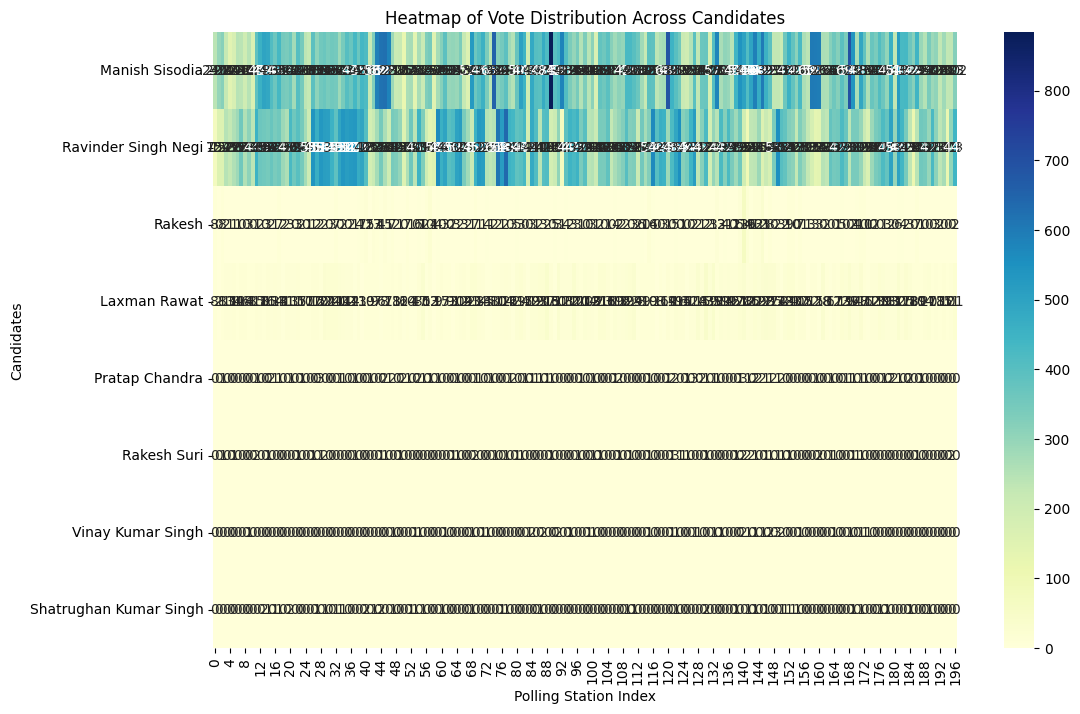

In [50]:
import seaborn as sns

# Select only candidate columns for the heatmap
candidates_columns = ['Manish Sisodia', 'Ravinder Singh Negi', 'Rakesh', 'Laxman Rawat',
                      'Pratap Chandra', 'Rakesh Suri', 'Vinay Kumar Singh', 'Shatrughan Kumar Singh']

# Heatmap to show vote distribution
plt.figure(figsize=(12, 8))
sns.heatmap(data[candidates_columns].transpose(), cmap='YlGnBu', annot=True, fmt="d", cbar=True)
plt.title("Heatmap of Vote Distribution Across Candidates")
plt.xlabel("Polling Station Index")
plt.ylabel("Candidates")
plt.show()

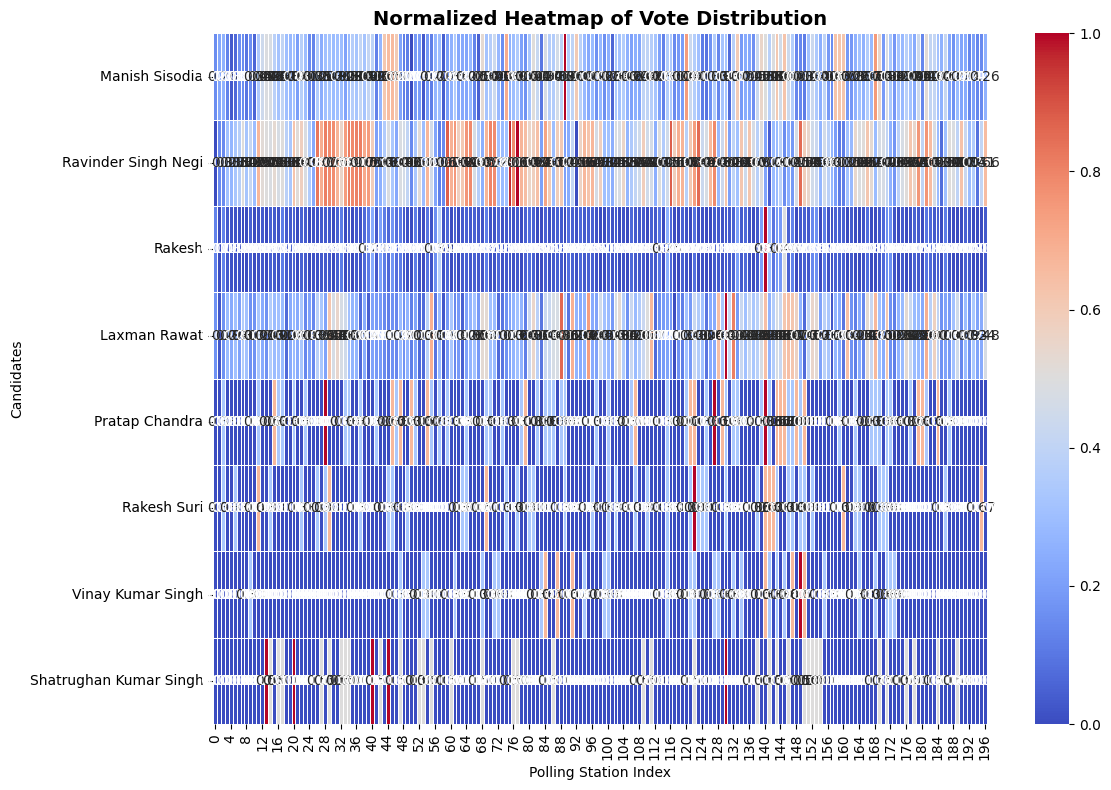

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the vote data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[candidates_columns])
normalized_df = pd.DataFrame(normalized_data, columns=candidates_columns).transpose()

# Heatmap with normalized data
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title("Normalized Heatmap of Vote Distribution", fontsize=14, weight='bold')
plt.xlabel("Polling Station Index")
plt.ylabel("Candidates")
plt.tight_layout()
plt.show()
